In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive")
# !ls "/content/gdrive/MyDrive/data"

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
# Helper libraries
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print("the shape of train_images:",train_images.shape)
print("the length of train_images:",len(train_images))
print("the shape of test_images:",test_images.shape)
print("the length of test_images:",len(test_images))

print("/nthe content in train_labels:",train_labels)


the shape of train_images: (60000, 28, 28)
the length of train_images: 60000
the shape of test_images: (10000, 28, 28)
the length of test_images: 10000
/nthe content in train_labels: [9 0 0 ... 3 0 5]


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

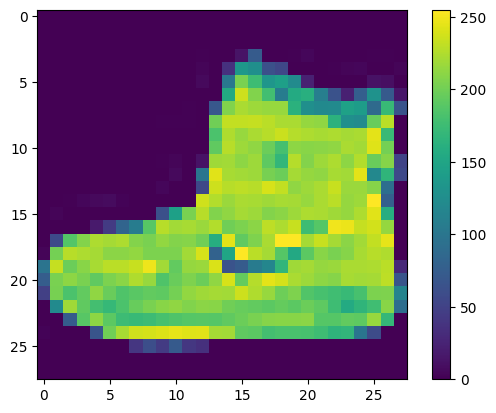

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# convert
train_images = train_images / 255.0
test_images = test_images / 255.0

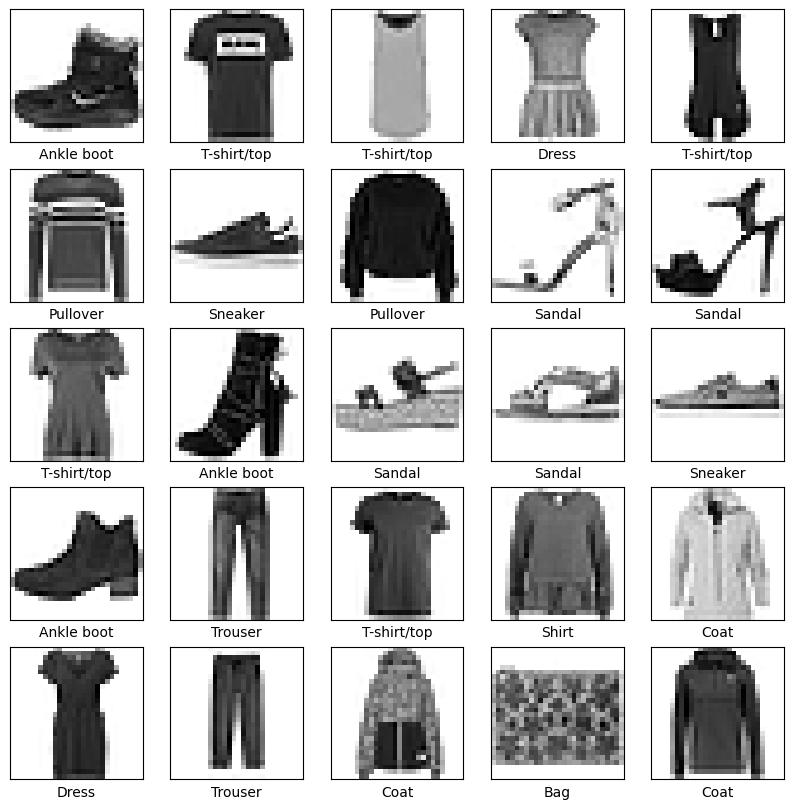

In [9]:
# show first 25 images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
class GrayscaleToRGB(Layer):
    def __init__(self, **kwargs):
        super(GrayscaleToRGB, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.image.grayscale_to_rgb(inputs)

In [27]:
# pretrained_base = hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5")
pretrained_base = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/classification/1")

In [37]:
# define model
def create_model_simple():
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10)
  ])
  model.compile(optimizer='adam',
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
         metrics=['accuracy'])
  return model

def create_model_inception_v1():
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    GrayscaleToRGB(),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
  ])
  model.compile(optimizer='adam',
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
         metrics=['accuracy'])
  return model
def create_model_efficientnet():
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    GrayscaleToRGB(),
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
  ])
  model.compile(optimizer='adam',
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
         metrics=['accuracy'])
  return model
def create_model_mobilenet():
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    GrayscaleToRGB(),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
                   trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
  ])
  model.compile(optimizer='adam',
         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
         metrics=['accuracy'])
  return model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)

In [13]:
# def convert_image(image):
#     image = tf.expand_dims(image, axis=0)
#     image = tf.expand_dims(image, axis=-1)
#     return tf.tile(image, [1, 1, 1, 3])
# train_images=convert_image(train_images)
# test_images=convert_image(test_images)
# train_images = tf.image.grayscale_to_rgb(train_images)
# test_images = tf.image.grayscale_to_rgb(test_images)

**model_simple**

In [23]:
model_simple=create_model_simple()

In [24]:
# train model
history_simple=model_simple.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10, callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4940 - accuracy: 0.8266 - val_loss: 0.4418 - val_accuracy: 0.8413
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8648 - val_loss: 0.3866 - val_accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.8769 - val_loss: 0.4083 - val_accuracy: 0.8526
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8860 - val_loss: 0.3540 - val_accuracy: 0.8724
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8922 - val_loss: 0.3720 - val_accuracy: 0.8666
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2771 - accuracy: 0.8966 - val_loss: 0.3700 - val_accuracy: 0.8652
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2650 - accuracy: 0.9012 - val_loss: 0.3470 - val_accuracy:

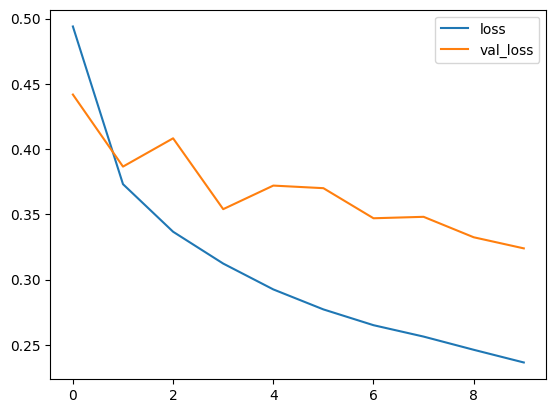

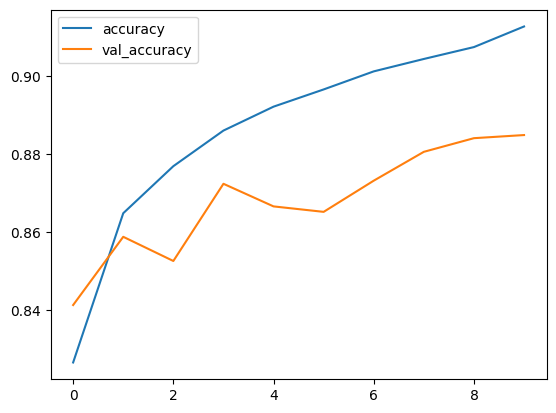

In [26]:
history_frame_simple = pd.DataFrame(history_simple.history)
history_frame_simple.loc[:, ['loss', 'val_loss']].plot()
history_frame_simple.loc[:, ['accuracy', 'val_accuracy']].plot();

**model_inception_v1**

In [14]:
model_inception_v1=create_model_inception_v1()

In [15]:
# train model
history_inception_v1=model_inception_v1.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10, callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 31s 10ms/step - loss: 0.6073 - accuracy: 0.7799 - val_loss: 0.5611 - val_accuracy: 0.7964
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5003 - accuracy: 0.8159 - val_loss: 0.5263 - val_accuracy: 0.8090
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4634 - accuracy: 0.8265 - val_loss: 0.5039 - val_accuracy: 0.8164
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4425 - accuracy: 0.8348 - val_loss: 0.5278 - val_accuracy: 0.8118
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4257 - accuracy: 0.8403 - val_loss: 0.4942 - val_accuracy: 0.8237
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4110 - accuracy: 0.8457 - val_loss: 0.4959 - val_accuracy: 0.8271
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4016 - accuracy: 0.8497 - val_loss: 0.5097 - val_

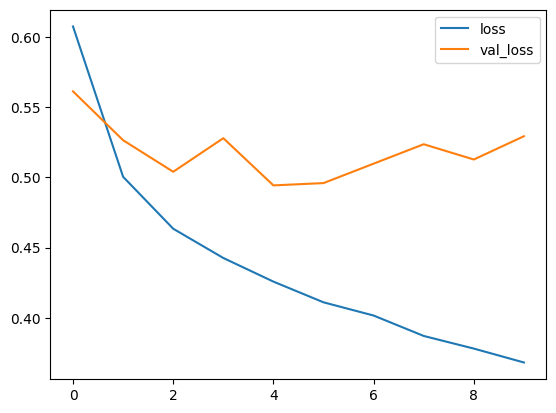

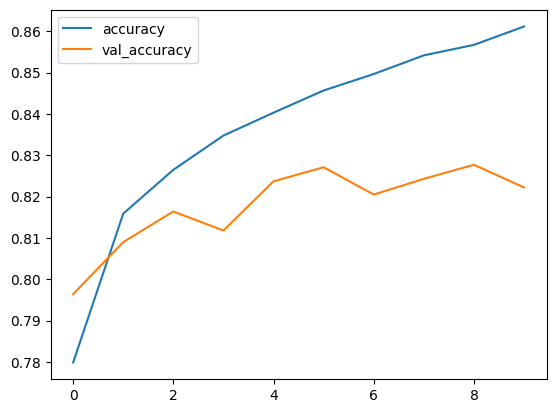

In [16]:
history_frame_inception_v1 = pd.DataFrame(history_inception_v1.history)
history_frame_inception_v1.loc[:, ['loss', 'val_loss']].plot()
history_frame_inception_v1.loc[:, ['accuracy', 'val_accuracy']].plot();

**model_efficientnet**

In [34]:
model_efficientnet=create_model_efficientnet()

In [35]:
# train model
history_efficientnet=model_efficientnet.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10, callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 36s 13ms/step - loss: 1.8924 - accuracy: 0.4202 - val_loss: 1.4658 - val_accuracy: 0.5495
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2873 - accuracy: 0.5934 - val_loss: 1.1570 - val_accuracy: 0.6241
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 1.0889 - accuracy: 0.6387 - val_loss: 1.0296 - val_accuracy: 0.6544
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.9891 - accuracy: 0.6666 - val_loss: 0.9614 - val_accuracy: 0.6668
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.9239 - accuracy: 0.6847 - val_loss: 0.8967 - val_accuracy: 0.6942
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8767 - accuracy: 0.6996 - val_loss: 0.8596 - val_accuracy: 0.7071
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.8397 - accuracy: 0.7103 - val_loss: 0.8349 -

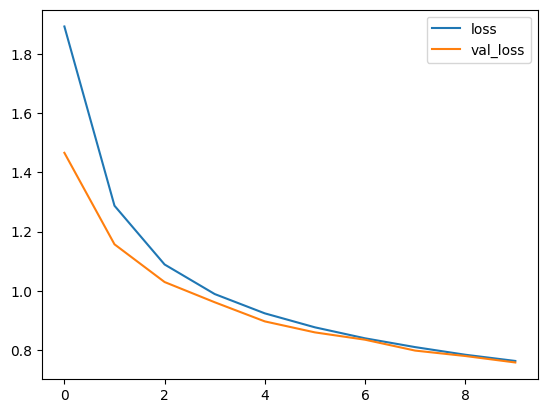

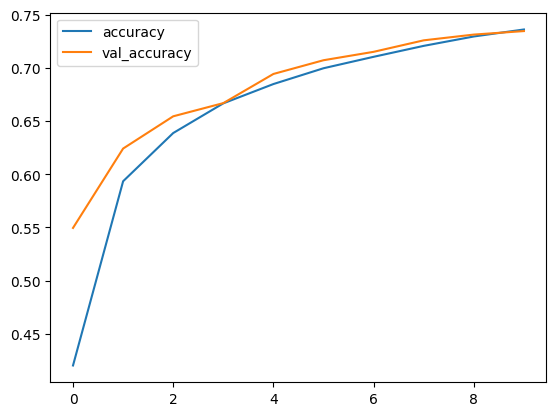

In [36]:
history_frame_efficientnet = pd.DataFrame(history_efficientnet.history)
history_frame_efficientnet.loc[:, ['loss', 'val_loss']].plot()
history_frame_efficientnet.loc[:, ['accuracy', 'val_accuracy']].plot();

**model_mobilenet**

In [38]:
model_mobilenet=create_model_mobilenet()

ValueError: ignored

In [ ]:
# train model
history_mobilenet=model_mobilenet.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10, callbacks=[early_stopping])

In [ ]:
history_frame_mobilenet = pd.DataFrame(history_mobilenet.history)
history_frame_mobilenet.loc[:, ['loss', 'val_loss']].plot()
history_frame_mobilenet.loc[:, ['accuracy', 'val_accuracy']].plot();

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.5292 - accuracy: 0.8222 - 2s/epoch - 6ms/step

Test accuracy: 0.8222000002861023


**Prediction**

In [18]:
# 模型经过训练后，使用它对一些图像进行预测。附加一个 Softmax 层，将模型的线性输出 logits 转换成更容易理解的概率。
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [20]:
print(predictions)

[[6.20342597e-11 6.91966229e-17 1.21119030e-13 ... 1.13639049e-03
  1.18717958e-09 9.98817980e-01]
 [7.51773408e-03 1.26740697e-12 9.89621639e-01 ... 5.47949753e-07
  2.42174327e-04 3.49654101e-08]
 [5.84452494e-07 9.99999285e-01 6.86175596e-08 ... 1.21896009e-21
  3.52391514e-18 2.31442087e-24]
 ...
 [2.67049674e-13 4.06223027e-10 2.32938343e-12 ... 1.20361552e-14
  1.00000000e+00 8.57833281e-13]
 [7.36221864e-07 9.99888659e-01 3.00539227e-07 ... 4.60968952e-09
  5.66977409e-10 1.16666534e-07]
 [1.48933097e-07 9.69554905e-12 3.51660437e-11 ... 1.71713680e-01
  5.71880400e-06 8.12560022e-01]]


In [21]:
# 将其绘制成图表，看看模型对于全部 10 个类的预测。
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

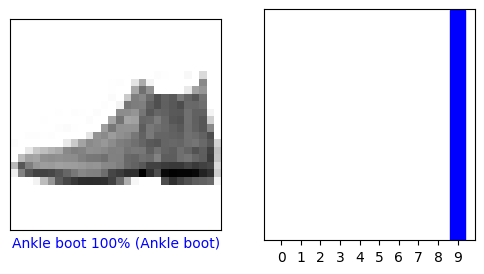

In [22]:
# 看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()